# Question 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def applyFilt(img, typ = 'ideal', D_th = 10, order = 2):
    res = np.asarray(img, dtype = complex)
    f = np.fft.fftshift(np.fft.fft2(img))
    
    x = np.power(np.arange(img.shape[0]) - img.shape[0]//2, 2)
    y = np.power(np.arange(img.shape[1]) - img.shape[1]//2, 2)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X + Y)
    if typ == 'ideal':
        filt = np.where(Z <= D_th, 1, 0)
    elif typ == 'butter':
        filt = 1/ (1 + np.power(Z/D_th, 2*order))
    elif typ == 'gauss':
        filt = np.exp(-1/2*np.power(Z/D_th, 2))
    out = np.multiply(f, filt.T)
    return np.abs(np.fft.ifft2(np.fft.ifftshift(out))), np.abs(filt)

## Ideal Low pass filter :

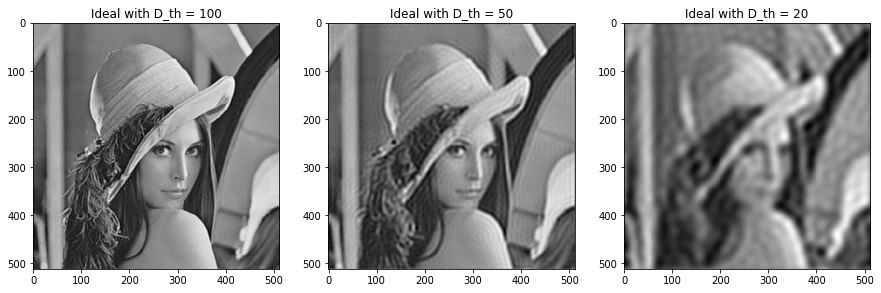

In [3]:
img = cv2.imread('./res/lena.jpg', 0)
d1 = 100
d2 = 50
d3 = 20
out1 = applyFilt(img, 'ideal', d1)[0]
out2 = applyFilt(img, 'ideal', d2)[0]
out3 = applyFilt(img, 'ideal', d3)[0]

arr = plt.subplots(1,3,figsize =(15,15))[1]
arr[0].imshow(out1, 'gray')
arr[0].set_title("Ideal with D_th = " + str(d1))
arr[1].imshow(out2, 'gray')
arr[1].set_title("Ideal with D_th = " + str(d2))
arr[2].imshow(out3, 'gray')
arr[2].set_title("Ideal with D_th = " + str(d3))
plt.show()

## Butterworth Low Pass filter :

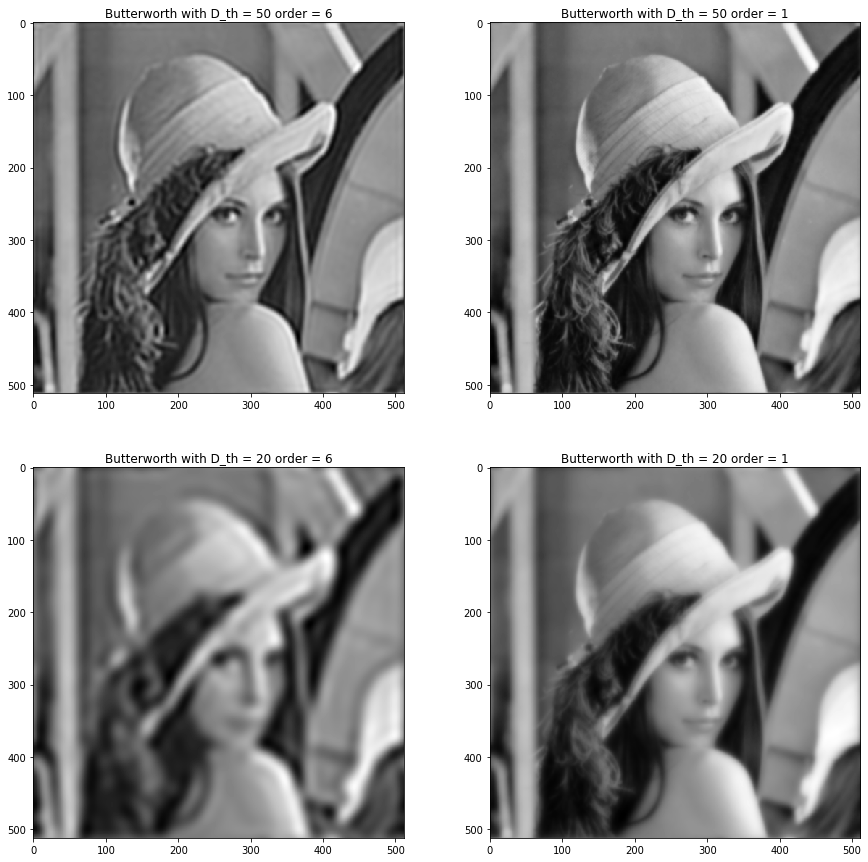

In [4]:
D_th = [50, 50, 20, 20]
order = [6, 1, 6, 1]
out1 = applyFilt(img, 'butter', D_th[0], order[0])[0]
out2 = applyFilt(img, 'butter', D_th[1], order[1])[0]
out3 = applyFilt(img, 'butter', D_th[2], order[2])[0]
out4 = applyFilt(img, 'butter', D_th[3], order[3])[0]

arr = plt.subplots(2,2,figsize =(15,15))[1]
arr[0][0].imshow(out1, 'gray')
arr[0][0].set_title("Butterworth with D_th = " + str(D_th[0]) + " order = " + str(order[0]))
arr[0][1].imshow(out2, 'gray')
arr[0][1].set_title("Butterworth with D_th = " + str(D_th[1]) + " order = " + str(order[1]))

arr[1][0].imshow(out3, 'gray')
arr[1][0].set_title("Butterworth with D_th = " + str(D_th[2]) + " order = " + str(order[2]))
arr[1][1].imshow(out4, 'gray')
arr[1][1].set_title("Butterworth with D_th = " + str(D_th[3]) + " order = " + str(order[3]))

plt.show()

## Gaussian Low pass filter :

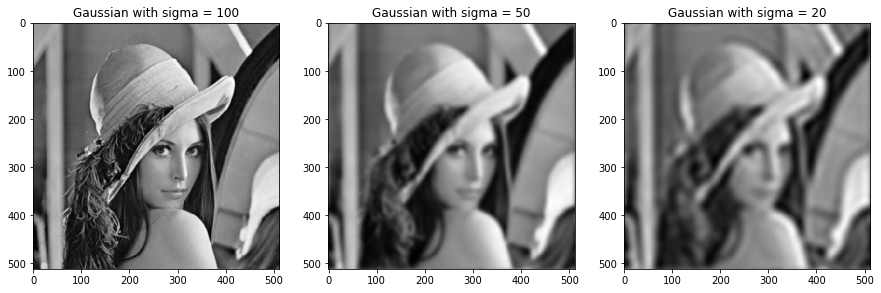

In [5]:
s = [100, 50, 20]
out1 = applyFilt(img, 'gauss', s[0])[0]
out2 = applyFilt(img, 'gauss', s[1])[0]
out2 = applyFilt(img, 'gauss', s[2])[0]

arr = plt.subplots(1,3,figsize =(15,15))[1]
arr[0].imshow(out1, 'gray')
arr[0].set_title("Gaussian with sigma = "+str(s[0]))
arr[1].imshow(out2, 'gray')
arr[1].set_title("Gaussian with sigma = "+str(s[1]))
arr[2].imshow(out3, 'gray')
arr[2].set_title("Gaussian with sigma = "+str(s[2]))
plt.show()

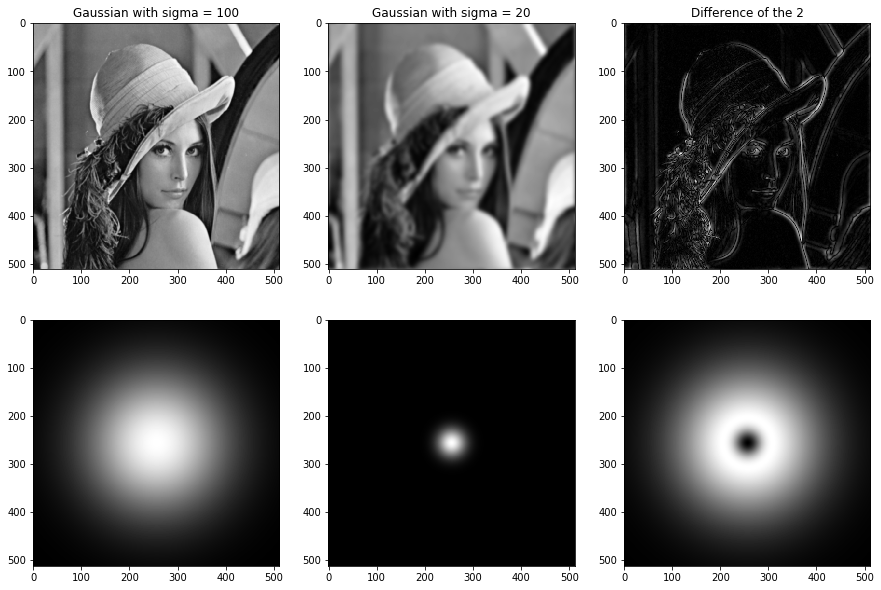

In [6]:
s1 = 100
s2 = 20
out1, f1 = applyFilt(img, 'gauss', s1)
out2, f2 = applyFilt(img, 'gauss', s2)

arr = plt.subplots(2,3,figsize =(15,10))[1]

arr[0][0].imshow(out1, 'gray')
arr[0][0].set_title("Gaussian with sigma = "+str(s1))
arr[0][1].imshow(out2, 'gray')
arr[0][1].set_title("Gaussian with sigma = "+str(s2))
arr[0][2].imshow(np.abs(out1 - out2), 'gray')
arr[0][2].set_title("Difference of the 2")

arr[1][0].imshow(f1, 'gray')
arr[1][1].imshow(f2, 'gray')
arr[1][2].imshow(np.abs(f1 - f2), 'gray')

plt.show()

## Observations :
> As we are subtracting 2 low pass filtered images with different sigma, it results in band pass filtering and hence the output.